## Abstract

Here i'm trying to classify a variable in a fraud detection data. I had some problems with the logistic regression and maybe is because the data has more no fraudulent data then the opposite. In the exploratory i see that fraudulent transactions has more ammount then the normal transaction. And in the final result i liked it, if you think that something can be improved please comment, it's a plearuse.


## Setup

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as srn
import statistics  as sts
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## Reading and preparing data

In [2]:
data = pd.read_csv('/kaggle/input/fraud-transaction-detection/Final Transactions.csv')
data.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [3]:
data.columns

Index(['Unnamed: 0', 'TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID',
       'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS',
       'TX_FRAUD', 'TX_FRAUD_SCENARIO'],
      dtype='object')

In [4]:
n = len(data)
m = np.random.randint(1,n,6000)
sample = data.iloc[m,]

In [5]:
sample = sample.iloc[:,1:]
sample.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
1365314,1365314,2023-05-23 10:52:11,2959,1964,1126.26,12307931,142,1,1
1206501,1206501,2023-05-06 17:14:10,1239,2456,761.49,10862050,125,0,0
374660,374660,2023-02-09 02:54:36,3758,6639,1210.39,3380076,39,1,1
1752383,1752383,2023-07-02 16:51:09,960,7398,1205.66,15785469,182,1,1
1014694,1014694,2023-04-16 16:39:43,3262,7511,924.65,9131983,105,0,0


In [6]:
sample.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO'],
      dtype='object')

In [7]:
sample = sample.drop(columns = ['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID'])
sample.head()

,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
1365314,1126.26,12307931,142,1,1
1206501,761.49,10862050,125,0,0
374660,1210.39,3380076,39,1,1
1752383,1205.66,15785469,182,1,1
1014694,924.65,9131983,105,0,0


## Exploratory

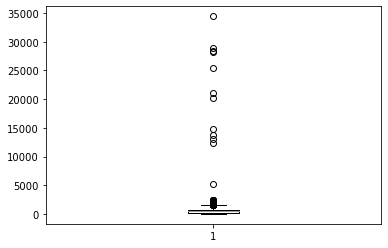

In [8]:
plt.boxplot(sample.TX_AMOUNT)
plt.show() 

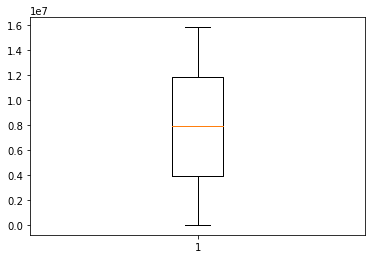

In [9]:
plt.boxplot(sample.TX_TIME_SECONDS)
plt.show() 

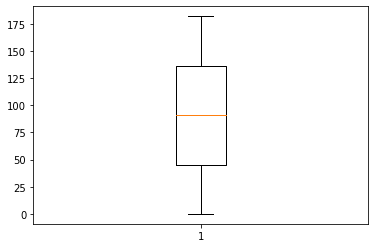

In [10]:
plt.boxplot(sample.TX_TIME_DAYS)
plt.show() 

<AxesSubplot:xlabel='TX_AMOUNT', ylabel='TX_TIME_DAYS'>

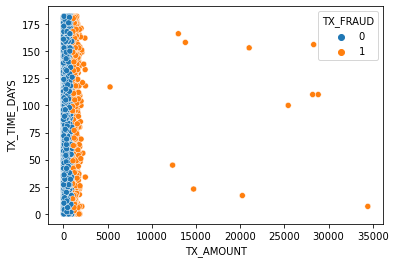

In [11]:
sns.scatterplot(x="TX_AMOUNT",y="TX_TIME_DAYS",hue="TX_FRAUD",data=sample)

<AxesSubplot:xlabel='TX_AMOUNT', ylabel='TX_TIME_SECONDS'>

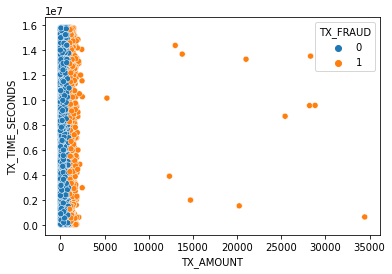

In [12]:
sns.scatterplot(x="TX_AMOUNT",y="TX_TIME_SECONDS",hue="TX_FRAUD",data=sample)

## Modeling

In [13]:
y = sample.TX_FRAUD
x = sample.drop(columns = ['TX_FRAUD', 'TX_FRAUD_SCENARIO'])

x_train, x_test, y_train, y_test = train_test_split(x ,y,test_size = 0.3,random_state = 0)

### Logistic Regression (ACC: 80%) 

In [14]:
model_log = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=400 )
model_log.fit(x_train, y_train)

y_pred = model_log.predict(x_test)
mean_absolute_error(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score:',int(acc*100),'%')

Accuracy Score: 80 %


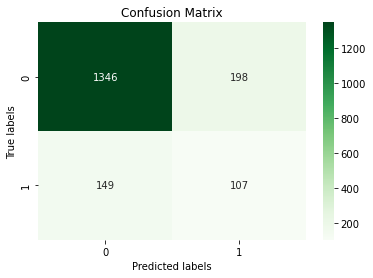

In [15]:
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', cmap = 'Greens', ax=ax); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['Boot', 'Sandal', 'Shoe']); ax.yaxis.set_ticklabels(['Boot', 'Sandal', 'Shoe']);

### Random Forest (ACC: 99%)

In [16]:
model_rf = RandomForestClassifier(n_estimators = 400)
model_rf.fit(x_train , y_train)

pred = model_rf.predict(x_test)
confusion = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
print('Accuracy Score:',int(acc*100),'%')

Accuracy Score: 99 %


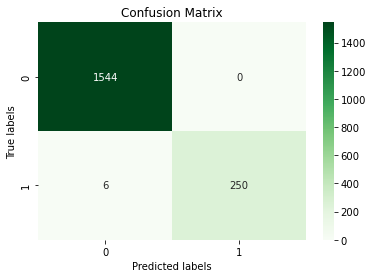

In [17]:
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', cmap = 'Greens', ax=ax); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['Boot', 'Sandal', 'Shoe']); ax.yaxis.set_ticklabels(['Boot', 'Sandal', 'Shoe']);

### XGBoost (ACC:99%)

In [18]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_train , y_train)

pred = model_xgb.predict(x_test)
confusion = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
print('Accuracy Score:',int(acc*100),'%')

Accuracy Score: 99 %


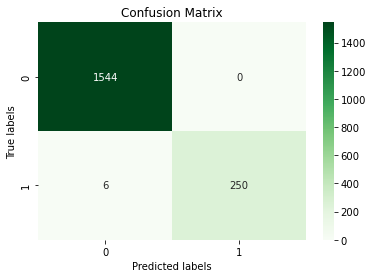

In [19]:
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', cmap = 'Greens', ax=ax); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['Boot', 'Sandal', 'Shoe']); ax.yaxis.set_ticklabels(['Boot', 'Sandal', 'Shoe']);